In [117]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df_NESTLE = pd.read_csv('C:/NESTLE_MODELO/VALORVENTAS_CAFENESTLE2018-2019.csv',index_col='FECHA',parse_dates=True)

In [146]:
df_nestle=df_NESTLE.copy()
df_nestle.index.freq = 'MS'
df_nestle['VALOR VENTAS'] = df_nestle['VALOR VENTAS'].str.replace('$', '')
df_nestle['VALOR VENTAS'] = df_nestle['VALOR VENTAS'].str.replace(',', '')
df_nestle['VALOR VENTAS'] = df_nestle['VALOR VENTAS'].astype(float)
df_nestle.columns = ['Valor_Ventas']
df_nestle

,Valor_Ventas
FECHA,
2018-01-01,2.214659e+08
2018-02-01,1.846783e+08
2018-03-01,1.928413e+08
2018-04-01,1.731945e+08
2018-05-01,1.623956e+08
2018-06-01,1.671838e+08
2018-07-01,2.031348e+08
2018-08-01,1.686695e+08
2018-09-01,1.840155e+08


<AxesSubplot:xlabel='FECHA'>

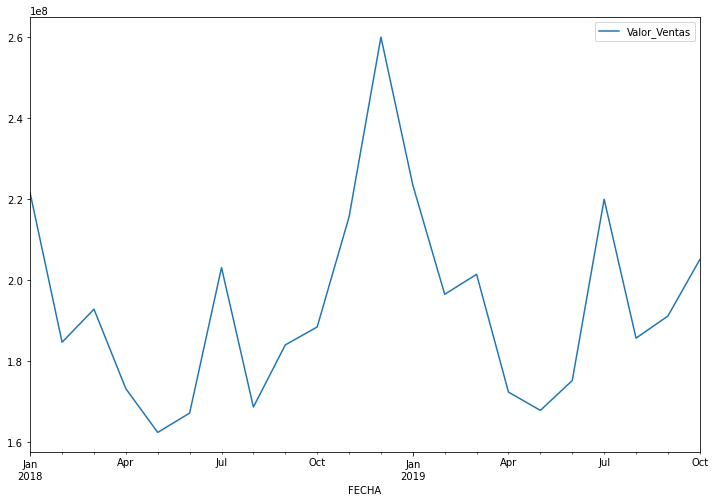

In [119]:
df_nestle.plot(figsize=(12,8))

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
train = df_nestle.iloc[:19]
test = df_nestle.iloc[19:]
scaler = MinMaxScaler()

In [122]:
Test= test.values.tolist()
Train= train.values.tolist()

In [160]:
scaler.fit(train)

MinMaxScaler()

In [149]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [161]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## MODELO:

In [162]:
#Implemente un modelo LSTM de Deeplearning ya que son idoneos para series de tiempo
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [164]:
model = Sequential()
model.add(LSTM(4, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [165]:
model.fit_generator(generator,epochs=50)

C:\Users\hecto\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
16/16 [==============================] - 2s 2ms/step - loss: 0.1566 
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1510
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1369
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1169
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1043
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0966
Epoch 13/50
16/16 [=============================

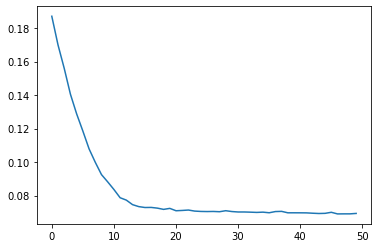

In [166]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [167]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [168]:
test_predictions

[array([0.3067066], dtype=float32),
 array([0.31980476], dtype=float32),
 array([0.33012912], dtype=float32)]

In [169]:
scaled_test

array([[0.23851801],
       [0.29441088],
       [0.43733744]])

In [170]:
true_predictions = scaler.inverse_transform(test_predictions)

In [171]:
true_predictions

array([[1.92351401e+08],
       [1.93630688e+08],
       [1.94639060e+08]])

In [103]:
comparacion=test.copy()

In [104]:
comparacion['Predicciones'] = true_predictions
comparacion

,Valor_Ventas,Predicciones
FECHA,,
2019-08-01,1.856915e+08,1.928879e+08
2019-09-01,1.911505e+08,1.935155e+08
2019-10-01,2.051100e+08,1.939115e+08


<AxesSubplot:xlabel='FECHA'>

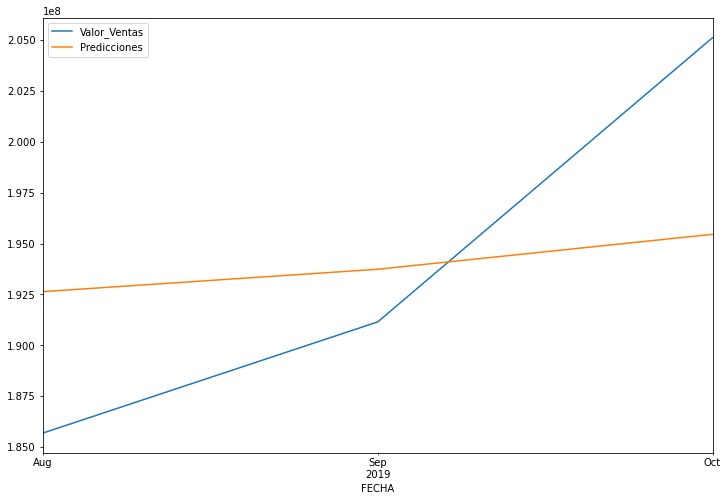

In [90]:
comparacion.plot(figsize=(12,8))

In [172]:
df_nestle['Ventas_Predicciones']=[221465906.43,184678323.51,192841335.09,173194531.62,162395586.97,167183838.5,203134807.94,168669516.59,184015489.89,188449080.48,
 215636544.72, 260064867.42,223495966.71,196515926.2,201459820.2,172357351.31,167842265.43,175218328.22,220008877.24,1.92351401e+08,1.93630688e+08,1.94639060e+08]

## Monto de las ventas con la comparación de las predicciones de los últimos tres meses

In [173]:
df_nestle

,Valor_Ventas,Ventas_Predicciones
FECHA,,
2018-01-01,2.214659e+08,2.214659e+08
2018-02-01,1.846783e+08,1.846783e+08
2018-03-01,1.928413e+08,1.928413e+08
2018-04-01,1.731945e+08,1.731945e+08
2018-05-01,1.623956e+08,1.623956e+08
2018-06-01,1.671838e+08,1.671838e+08
2018-07-01,2.031348e+08,2.031348e+08
2018-08-01,1.686695e+08,1.686695e+08
2018-09-01,1.840155e+08,1.840155e+08


<AxesSubplot:xlabel='FECHA'>

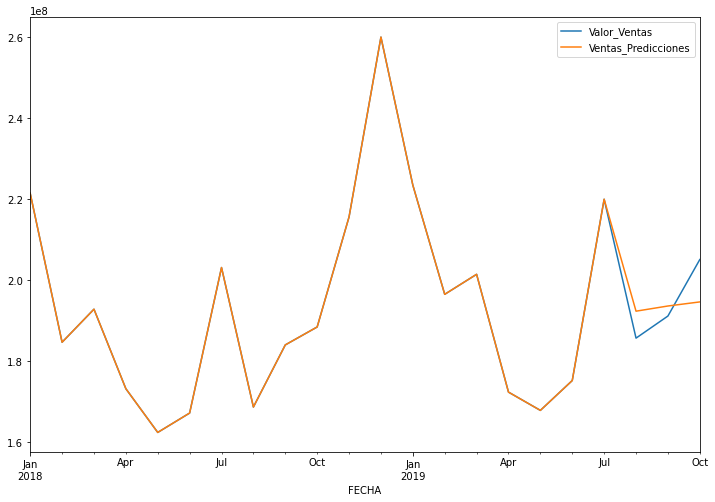

In [174]:
df_nestle.plot(figsize=(12,8))

In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [105]:
rmse = sqrt(mean_squared_error(Test, true_predictions))

In [114]:
rmse

7805737.829001619

In [176]:
def mda(actual:np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean((np.sign(actual[1:]-actual[:-1])==np.sign(predicted[1:]-predicted[:-1])).astype(int))

In [182]:
Test2=np.array(Test)
true_predictions2=np.array(true_predictions)

## PRECISIÓN DE MEDIA DIRECCIONAL (MDA):

In [184]:
print("MDA=",mda(Test2,true_predictions2))

MDA= 1.0
